<a href="https://colab.research.google.com/github/lumizel/AI_26/blob/main/04_01_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MBC 쇼핑몰에서는 럭키백을 판매하기로 하였다.
# 럭키팩에는 생선이 들어 있는데 종류가 7가지로 랜덤하게 들어 있다.
# 럭키팩에 확율을 표시해야 함 : 들어있는 7가지의 생선의 확률이 필요함
# 럭키백의 확률 : 생선이 7마리라고 가정함
# 생선의 크기, 무게 (길이, 높이, 두께, 대각선의길이, 무게)

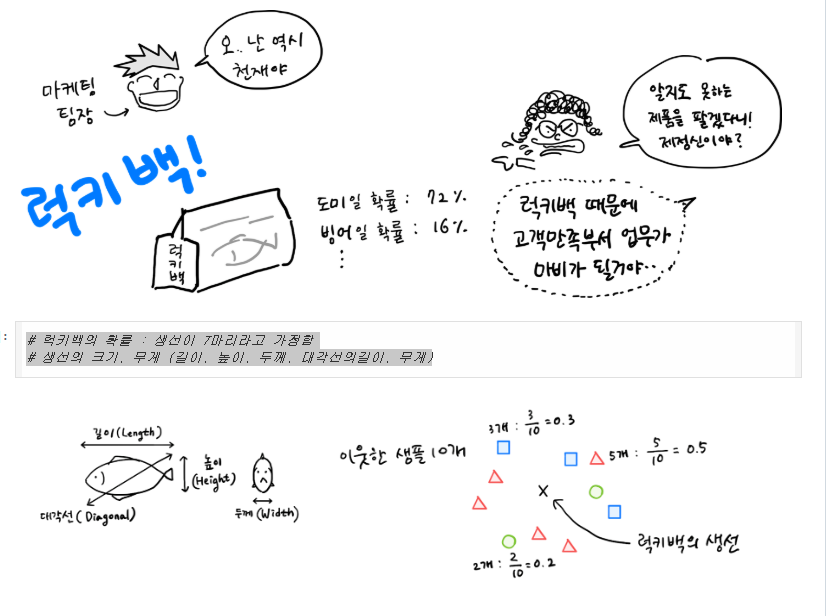

In [ ]:
# k-최근접 알고리즘을 이용해보면 회귀? 분류?
# 확률을 알고 싶은 것이기 때문에 회귀를 사용해보자!!!

# 샘플 10개중에 농어가 3개면 ?  3 / 10 = 0.3
# 빙어가 5개면 ?  5 / 10 = 0.5
# 도미가 2개면 ?  2 / 10 = 0.2 = 100%

# 사이킷런의 k-최근접 이웃 분리기도 이와 동일한 방식으로 확율 계산도 해줌

# 샘플데이터 준비
# 로지스틱 회귀 : 럭키백 확율
import pandas as pd # 판다스로 csv를 처리함
import requests
import io
import urllib3
from pandas.core.common import random_state

# 인시큐어 리퀘스트 경고(InsecureRequestWarning)를 무시하라는 설정
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
url = 'https://bit.ly/fish_csv_data'
response = requests.get(url, verify=False)

fish = pd.read_csv(io.StringIO(response.text)) # 웹에 있는 파일을 가져옴
fish.head() # 제일 위쪽 데이터 5개를 보여줌
# 어종(스피시즈), 무게, 길이, 대각선, 키, 너비(두께)

print(pd.unique(fish['Species'])) # 유니크하게 종류를 출력

<StringArray>
['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']
Length: 7, dtype: str


In [ ]:
# Bream : 브림(도미)
# Roach : 로치(유럽 잉어과 민물고기)
# Whitefish : 흰살송어(화이트피시)
# Parkki : 파르키 (핀란드산 붕어과 어종)
# Perch : 농어 (정확히는 유럽농어, 퍼치)
# Pike : 강꼬치고기(파이크)
# Smelt : 빙어
# 7개의 종류의 어종이 분포되어 있음

In [ ]:
# 분석용 입력 리스트값 생성
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# 원하는 필드를 넣어 필터링
print(fish_input[:5])  # 앞에서부터 5개만 출력

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
# 정답 리스트
fish_target = fish['Species'].to_numpy()
# fish[['Species']] 이렇게 하면 2차원 배열됨(금지) -> 정답파일은 1차원으로
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


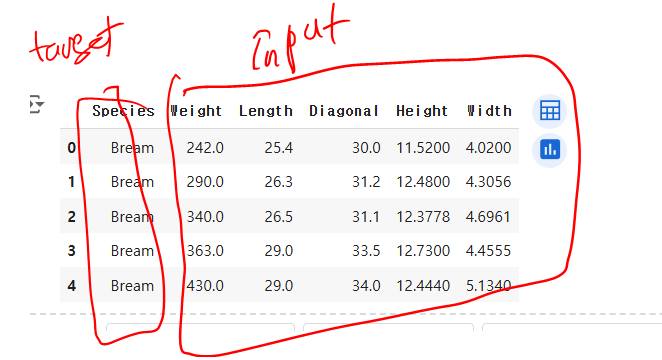

In [ ]:
# 훈련세트 생성
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target, random_state=42)

# fish_input ['Weight','Length','Diagonal','Height','Width'] 2차원배열
# fish_target ['Species'] 1차원배열

print(train_input.shape, test_input.shape)
# 훈련용 119개의 5개의 특성
# 테스트용 40개의 5개 특성

(119, 5) (40, 5)


In [ ]:
from sklearn.preprocessing import StandardScaler
# 표준점수는 데이터의 범위(스케일조정) = (값 - 평균) / 표준편차
ss = StandardScaler() # 싸이킷런의 전처리용(스케일조정 : 표준점수)
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


In [ ]:
 # k-최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3) # 이웃 3개 참고
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
# 전에는 0와 1을 찾는 이진분류 였지만 지금 타켓에 7개의 어종을 넣었음
print(kn.classes_)
# 7개의 생선 종류가 들어있다.
# 2개이상 클래스가 포함된 문제를 다중 분류라고 함.
# 주의사항 : 클래스의 순서가 인덱스로 되어 있으며 이것이 오름차순 형태로 보임

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5])) # 0~4번 인덱스까지 보자
# 처음 5개 샘플을 타깃값 예측 해보면 아래와 같다.

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
print(test_scaled[:5]) # 전처리과정에서 표준점수로 변환되어 보임

[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


In [ ]:
import numpy as np # 특성에 대한 확률을 보기 위해서 변환

# 사이킷 런이 번거로운 연산을 수행해줌으로 쉽게 결과가 나옴
proba = kn.predict_proba(test_scaled[:5])
# 각 클래스에 속할 확률을 반환하는 함수 predict_proba() Probability 의 약어

print(np.round(proba, decimals=4))
# 소수점 네번째 자리까지 표시(다섯번째에서 반올림)
# Bream Parkki Perch  Pike  Roach  Smelt  Whitefish' 이순서

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
# ['Perch'  100%
#  'Smelt'  100%
#  'Pike'   100%
#  'Perch'  66.66%
#  'Perch'  66.66% ] 3개의 이웃에 대한 분류 결과를 확인할 수 있다.

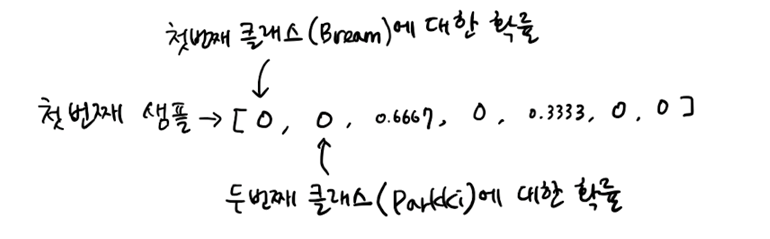

In [ ]:
# 이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인 필요함
distances, indexes = kn.kneighbors(test_scaled[3:4])
                                              # 4번째 값을 자세히 보자
print(train_target[indexes])
#                 Perch         Roach
#  [0.     0.     0.6667 0.     0.3333 0.     0.    ]
# Perch 2/3 , Roach 1/3 이기 때문에 7개를 확율로 제공되지 못함
# 이유 : n_neighbors=3으로 했기 때문에

# kneighbors는 더미데이터보다 더 높은 값이 들어올때 문제가 생긴다.

[['Roach' 'Perch' 'Perch']]


In [ ]:
# 알고리즘 변경 해보자 : 로지스틱 회구
# 로지스틱 회귀는 사이킷런에서 제공함
# 로지스틱 회귀는 이름이 회구이지만 분류 모델임

# 선형회귀와 동일하게 선형방정식을 학습
## z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f
# a, b, c, d, e, f 는 각 항목에 대한 가중치(중요도, 계수) 임
# z는 어떤 값도 가능함 하지만 확률이 되려면 0~1 (0% ~ 100%) 사이 값
# z가 아주 큰 음수일 때 0, 큰 양수일 때 1이 되도록 바꾸는 방법은 시그모이드 함수나 로지스틱 함수

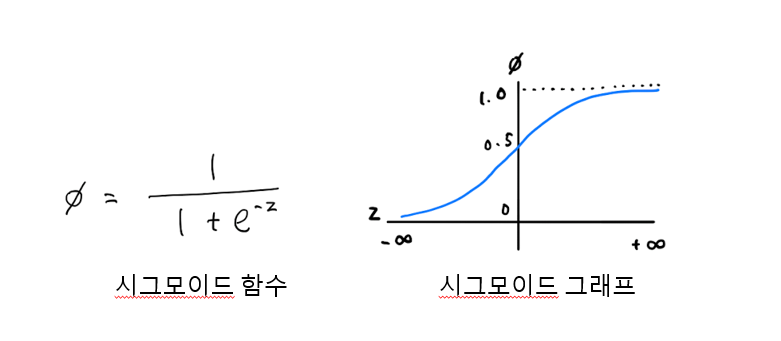

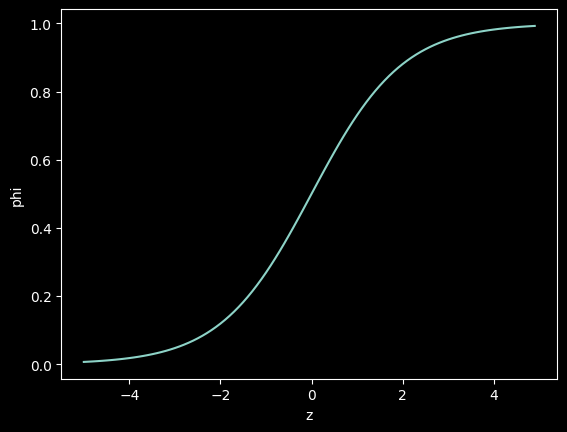

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수용 : z가 무한하게 큰 음수 일 경우 0에 가까워짐
# z가 무한하게 큰 양수 일 경우 1에 가까워짐
z = np.arange(-5,5,0.1) # -5~5까지 0.1 간격으로 배열 생성
phi = 1 / (1+np.exp(-z))  # np.exp() 함수로 시그모이드공식 암기

plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
# 선형 방정식의 출력 z의 음수를 사용해 자연 상수 e를 거듭제곱하고 1을 더한 값의 역수를 취함
# 이렇게 하면 0~1 사이 값을 0~100% 확률로 해석 가능

# 훈련전에 2진 분류부터 알아보자
# 2진 분류인 경우에는 시그모이드 함수 출력이 0.5보다 크면 양성 0.5보다 작으면 음성으로 판단
# 단 0.5가 나오면 라이브러리마다 다른데 사이킷런은 음성으로 판단함

In [ ]:
# 로지스틱 회귀로 이진 분류 수행 테스트

# 넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다. (불리언 인덱싱)
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True,False,True,False,False]]) # 불리언 인덱싱
# 결과 - True 값만 출력

['A' 'C']


In [ ]:
# 위와 같은 방식으로 훈련 세트에서 도미(Bream)와, 빙어(Smelt)의 행만 골라내보자.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
#                                   Bream(도미) or Smelt(빙어)

# bream_smelt_indexes에 도미와 빙어 일경우 True이고 나머지는 False가 들어 있다.
# 이 배열을 사용해서 train_scaled, train_target 배열에 인덱싱을 적용하면
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
# 손쉽게 도미와 빙어 데이터만 골라낼 수 있다.
print(train_bream_smelt)    # 도미이거나 빙어의 특성리스트

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]
 [-1.0824759  -1.61150165 -1.62162731 -1.7000674  -1.92815631]
 [ 0.10337949  0.04717013  0.23714575  0.88445197  0.41799764]
 [ 1.49668216  1.03112796  1.21864741  2.44274986  1.40289707]
 [ 0.23004337  0.23459067  0.42823457  1.3336029   0.39983213]
 [-0.42579405 -0.29018684 -0.11028847  0.65627104 -0.26107519]
 [ 1.28557569  0.70314202  0.89727076  1.98228866  1.06683526]
 [ 0.93373158  0.60943175  0.83646978  1.85150445  0.97832415]
 [ 0.80706771  0.60943175  0.81041221  1.63137406  1.0255057 ]
 [-1.07262426 -1.52716241 -1.55214047 -1.67235972 -1.86207776]
 [ 1.6374198   1.17169337  1.27076255  2.41341232  1.40143407]
 [-1.07966115 -1.63961473 -1.67374245 -1.6462819  -1.87

In [ ]:
print(target_bream_smelt) # 도미이거나 빙어의 정답리스트

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream'
 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream']


In [ ]:
# 사이킷런에 선형모델에 로지스틱 회귀 클래스를 사용
from sklearn.linear_model import LinearRegression, LogisticRegression

lr = LogisticRegression() # 로지스틱 회귀 객체를 변수에 연결
lr.fit(train_bream_smelt, target_bream_smelt)  # 훈련시작 -> 2진 분류로 나옴
# 0.5이하면 거짓 초과이면 참

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [ ]:
# train_bream_smelt 처음 5개의 값으로 결론을 보자
print(lr.predict(train_bream_smelt[:5])) # 도미 4개 , 빙어 1개

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))  # 확률 확인 (predict_proba)

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [ ]:
# 샘플마다 2개의 확률이 출력된다. (시그모이드 함수)
# 첫번째 열이 0(음성)에 대한 확율, 두번째 열이 1(양성)에 대한 확율임
# 사이킷런의 타깃 값은 알파벳 순으로 정렬해서 사용함
print(lr.classes_) # Smelt(빙어)가 양성으로 사용됨
# 두번째 샘플만 양성 클래스인 빙어의 확률이 높다. (나머지는 도미로 예측함)
# 만약 도미(Bream)를 양성 클래스로 사용하고 싶으면
# 전에 전처리에서 Bream인 타킷값을 1로 만들어야 함

['Bream' 'Smelt']


In [ ]:
# 로지스틱 회귀로 학습한 계수(중요도:가중치)를 봐보자.
print(lr.coef_, lr.intercept_)
# [[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]
# 선형 방정식에 대입해서 결과가 나옴
# z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f
# z = -0.40451732 * (Weight) + -0.57582787 * (Length) + -0.66248158 * (Diagonal)
#     -1.01329614 * (Height) + -0.73123131 * (Width) + -2.16172774 로 가중치가 결정됨

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [ ]:
z = -0.40451732 * (train_bream_smelt[0,0]) + -0.57582787 * (train_bream_smelt[0,1]) \
 + -0.66248158 * (train_bream_smelt[0,2]) + -1.01329614 * (train_bream_smelt[0,3]) \
 + -0.73123131 * (train_bream_smelt[0,4]) + -2.16172774
print(z)

-6.0299135794102545


In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
# train_bream_smelt의 처음 5개의 z값을 출력해보자
print(decisions) # 각 특성을 계산한 z 결과 값이 나옴

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [ ]:
# 이 z 값을 시그모이드 함수에 통과 시키면 확률을 얻을 수 잇
# 파이썬의 사이파이 라이브러리에더소 시그모이드 가능 - explt()
from scipy.special import expit

print(expit(decisions)) # phi = 1 / (1 + np.exp(-z)) - 시그모이드 공식

# 여기까지가 2개의 물고기 분류하는 방법
# 도미        빙어       도미       도미       도미
# [0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [ ]:
# 다중 분류로 진행해보기 (2진 분류는 참 아니면 모두 거짓 처리됨)
# 현재 어종이 7개 임으로 로지스틱 회귀로 분류를 학습함.

# LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용함 (max_iter=100)
# max_iter=100 반복횟수를 100으로 하면 부족하다라는 경고 문구가 나와 1000으로 향상
# LogisticRegression 기본적으로 릿지 회귀와 같은 계수를 제곱을 규제한다. (L2 규제)
# 릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절 하였음 -> alpha가 크면 규제도 커짐
# LogisticRegression 규제를 제어하는 매개변수가 C 로 되어있음 -> C가 작으면 규제가 커짐(기본1)
# 규제를 완화하기 위해서 20으로 늘리겠다.

lr = LogisticRegression(C=20, max_iter=1000) # max_iter=1000 정확도를 위해서 1000번 반복
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target)) # 93.27%
print(lr.score(test_scaled, test_target)) # 92.5% 과소나 과대적합이 아닌듯함.

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))  # 0~4번 인덱스 결과(분석시 다중 분류로 나옴)

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
# 각 클래스에 속할 확률을 반환하는 함수 predict_proba()
print(np.round(proba, decimals=3))
#  Bream Parkki Perch Pike  Roach Smelt Whitefish
# [[0.    0.014 0.842 0.    0.135 0.007 0.003] = 1.001
#  [0.    0.003 0.044 0.    0.007 0.946 0.   ] = 1.0
#  [0.    0.    0.034 0.934 0.015 0.016 0.   ] = 0.999
#  [0.011 0.034 0.305 0.006 0.567 0.    0.076] = 0.999
#  [0.    0.    0.904 0.002 0.089 0.002 0.001]] = 0.998

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_) # 알파벳 순 정렬
# 7개의 클래스가 명확하게 구분 됨

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# 다중 분류일때 선형방정식
print(lr.coef_.shape, lr.intercept_.shape)
# (7,5)이 데이터는 5개의 특성을 사용함. 7행을 가짐
# (7,) 7개의 행 -> 이진 분류에서 보았던 z를 7개를 계산함.
# 다중 분류는 클래스마다 z값을 하나씩 계산 한다는 의미
# 당연히 가장 높은 z 값을 출력하는 클래스가 예측 클래스가 됨

(7, 5) (7,)


In [ ]:
# 그럼 확률은 ? 이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1사이 값으로 변환 했었다.
# 그러나 다중 분류에서 소프트맥스 함수를 사용해서 7개의 z값을 확률로 변환한다.

# 소프트맥스 계산법
# e_sum = e^z1 + e^z2 + e^z3 + e^z4 + e^z5 + e^z6 + e^z7
# s1 = e^z1 / e_sum ...... s7 = e^z7 / e_sum ->  s1 ~ s7 까지 모두 더하면 분모가 같아져 1이 됨

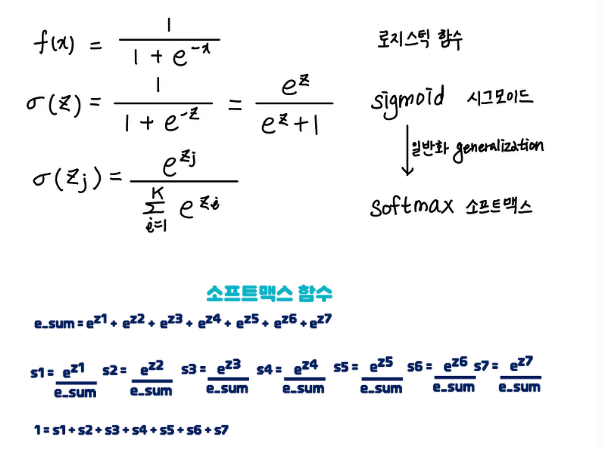

In [ ]:
# 0~4번 읻게스의 테스트 리스트에서 결과를 출력함
decisions = lr.decision_function(test_scaled[:5])
print('5개의 샘플에 대한 z1~z7의 값\n')
for idx,z in enumerate(decisions): # 선형방정식을 이용한 7개의 특성값
    print(f'{idx}번째 샘플의 z값\n{z}\n')

# 5개 샘플에 대한 z1 ~ z7의 값

5개의 샘플에 대한 z1~z7의 값

0번째 샘플의 z값
[-6.50722806  1.03902669  5.16819136 -2.7573035   3.33655199  0.34625853
 -0.62549701]

1번째 샘플의 z값
[-10.8790074    1.94410615   4.77600603  -2.42306185   2.98748716
   7.84171366  -4.24724376]

2번째 샘플의 z값
[-4.33809948 -6.23690279  3.16746647  6.48091388  2.36412675  2.43431894
 -3.87182377]

3번째 샘플의 z값
[-0.69143987  0.44628535  2.64291145 -1.21457288  3.2612452  -5.70143412
  1.25700487]

4번째 샘플의 z값
[-6.40138603 -1.99137621  5.81526371 -0.13464404  3.49905131 -0.0875349
 -0.69937384]



In [ ]:
from scipy.special import softmax # 소프트맥스를 사용하여 7개를 100%로 분류
print('소프트맥스 함수로 예측 확률 구하기\n')
class_ = lr.classes_.tolist() + ["예측 결과"]
prd = lr.predict(test_scaled[:5]).reshape(5,-1)
sm = softmax(decisions, axis=1).round(4)*100
con = np.column_stack((sm,prd))
print(pd.DataFrame(con,columns=class_))

소프트맥스 함수로 예측 확률 구하기

  Bream Parkki  Perch   Pike  Roach  Smelt Whitefish  예측 결과
0   0.0   1.36   84.2   0.03  13.48   0.68      0.26  Perch
1   0.0   0.26   4.41    0.0   0.74  94.59       0.0  Smelt
2   0.0    0.0    3.4  93.44   1.52   1.63       0.0   Pike
3  1.09    3.4  30.54   0.65  56.68   0.01      7.64  Roach
4   0.0   0.04  90.43   0.24   8.92   0.25      0.13  Perch
